# KNN Basic & KNN Baseline

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from surprise import KNNBasic
from surprise import KNNBaseline
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold, GridSearchCV

In [2]:
# Data
df = pd.read_csv("./data/full_data_cleaned.csv")
df.head()

,author_id,rating_x,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,price_usd_x,brand_id,ingredients,limited_edition,out_of_stock,sephora_exclusive,highlights,primary_category,num_rating,niche_product
0,1238130325,4,1.0,NaN,0,0,0,3/12/23,I love this lippy…it makes my lips soft and al...,Yumm,...,24.0,6125,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,1227,0
1,27991208736,3,1.0,0.0,1,1,0,3/9/23,ive tried my friend’s a few times and it does ...,overrated/overpriced,...,24.0,6125,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,1227,0
2,9467587295,5,1.0,0.5,2,1,1,3/7/23,This product is a DEFINITE must for chapped li...,Life saver,...,24.0,6125,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,1227,0
3,12367701277,5,1.0,NaN,0,0,0,3/5/23,Love this lip masks so much I bought so many o...,Love 💗,...,24.0,6125,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,1227,0
4,33161024868,3,0.0,1.0,1,0,1,3/4/23,I don’t see the hype for this product. It does...,Works every once in a while,...,24.0,6125,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,1227,0


In [3]:
# Select related columns
rating_df = df[['author_id', 'product_id', 'rating_x']]
rating_df.head()

,author_id,product_id,rating_x
0,1238130325,P420652,4
1,27991208736,P420652,3
2,9467587295,P420652,5
3,12367701277,P420652,5
4,33161024868,P420652,3


In [4]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424374 entries, 0 to 424373
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   author_id   424374 non-null  object
 1   product_id  424374 non-null  object
 2   rating_x    424374 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 9.7+ MB


In [5]:
from collections import Counter

def filter_users_with_enough_predictions(df, min_predictions=2):
    # Count the number of ratings for each user
    user_counts = df['author_id'].value_counts()
    
    # Filter out users with fewer than min_predictions
    users_with_enough_predictions = user_counts[user_counts >= min_predictions].index
    
    # Filter the DataFrame to retain only the relevant users
    filtered_df = df[df['author_id'].isin(users_with_enough_predictions)]
    
    return filtered_df

# Filter the DataFrame to retain only users with at least two predictions
filtered_df = filter_users_with_enough_predictions(rating_df, min_predictions=2)

print(filtered_df.info)

# Building Surprise train dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(filtered_df[['author_id', 'product_id', 'rating_x']], reader)

<bound method DataFrame.info of           author_id product_id  rating_x
0        1238130325    P420652         4
1       27991208736    P420652         3
2        9467587295    P420652         5
3       12367701277    P420652         5
4       33161024868    P420652         3
...             ...        ...       ...
424369  12175422344    P505392         5
424370   2276253200    P505392         5
424371  28013163278    P505392         5
424372   1539813076    P505392         5
424373  27666075558    P505392         5

[424260 rows x 3 columns]>


# KNN Basic

In [6]:
# setting up a possible values of hyperparameter
param_grid_knnbasic = {
    'k': [10,20,30,40,50],
    'sim_options': {
        'name': ['pearson'],
        'min_support': [1,3,5],
        'user_based': [False]
    },
    'random_state': [2024]
}

In [7]:
# setting up for grid search
gs_knnbasic = GridSearchCV(KNNBasic,
                 param_grid_knnbasic,
                 measures=['rmse', 'mae', 'fcp'],
                 cv=KFold(n_splits = 5, random_state = 2024))

In [8]:
# fit data to model
gs_knnbasic.fit(data)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

In [9]:
# Convert list of parameters to DataFrame
results_df_knnbasic = pd.DataFrame(gs_knnbasic.cv_results['params'])

# Add new columns to the dataframe
results_df_knnbasic['RMSE'] = gs_knnbasic.cv_results['mean_test_rmse']
results_df_knnbasic['MAE'] = gs_knnbasic.cv_results['mean_test_mae']
results_df_knnbasic['FCP'] = gs_knnbasic.cv_results['mean_test_fcp']

# View result dataframe
results_df_knnbasic

,k,sim_options,random_state,RMSE,MAE,FCP
0,10,"{'name': 'pearson', 'min_support': 1, 'user_ba...",2024,0.981546,0.569223,0.543131
1,10,"{'name': 'pearson', 'min_support': 3, 'user_ba...",2024,0.977340,0.566360,0.544996
2,10,"{'name': 'pearson', 'min_support': 5, 'user_ba...",2024,0.966992,0.560167,0.544723
3,20,"{'name': 'pearson', 'min_support': 1, 'user_ba...",2024,0.981132,0.569150,0.545522
4,20,"{'name': 'pearson', 'min_support': 3, 'user_ba...",2024,0.976984,0.566337,0.546271
5,20,"{'name': 'pearson', 'min_support': 5, 'user_ba...",2024,0.966672,0.560213,0.547012
6,30,"{'name': 'pearson', 'min_support': 1, 'user_ba...",2024,0.981096,0.569151,0.545353
7,30,"{'name': 'pearson', 'min_support': 3, 'user_ba...",2024,0.976953,0.566344,0.546525
8,30,"{'name': 'pearson', 'min_support': 5, 'user_ba...",2024,0.966646,0.560235,0.547022
9,40,"{'name': 'pearson', 'min_support': 1, 'user_ba...",2024,0.981084,0.569146,0.545825


In [11]:
# Save file
results_df_knnbasic.to_csv(path_or_buf='KNNBasic_hyperparam_item.csv', index=False)

In [10]:
# extract best set of hyperparameter per each
print('Best ranking (FCP):', gs_knnbasic.best_score['fcp'])
print('Best parameters for ranking (FCP):', gs_knnbasic.best_params['fcp'])

print('Best MAE:', gs_knnbasic.best_score['mae'])
print('Best parameters for MAE:', gs_knnbasic.best_params['mae'])

print('Best RMSE:', gs_knnbasic.best_score['rmse'])
print('Best parameters for RMSE:', gs_knnbasic.best_params['rmse'])

Best ranking (FCP): 0.5473770725645135
Best parameters for ranking (FCP): {'k': 50, 'sim_options': {'name': 'pearson', 'min_support': 5, 'user_based': False}, 'random_state': 2024}
Best MAE: 0.5601668019545465
Best parameters for MAE: {'k': 10, 'sim_options': {'name': 'pearson', 'min_support': 5, 'user_based': False}, 'random_state': 2024}
Best RMSE: 0.9666391790312693
Best parameters for RMSE: {'k': 50, 'sim_options': {'name': 'pearson', 'min_support': 5, 'user_based': False}, 'random_state': 2024}


# KNN Baseline

In [13]:
# setting up a possible values of hyperparameter (we use best param resulted in tuning in BaselineOnly and KNNBasic)
param_grid_knnbaseline = {
    'bsl_options': {
        'method': ['sgd'],  
        'reg': [0.01, 0.05, 0.1, 0.2],
        'learning_rate': [0.001, 0.005, 0.01, 0.05],
        'n_epochs': [5, 10, 20, 50],
    },
    'k': [10,20,30,40,50],
    'sim_options': {
        'name': ['pearson'],
        'min_support': [1,3,5],
        'user_based': [False]
    },
    'random_state': [2024]
}

In [14]:
# setting up for grid search
gs_knnbaseline = GridSearchCV(KNNBaseline,
                 param_grid_knnbaseline,
                 measures=['rmse', 'mae', 'fcp'],
                 cv=KFold(n_splits = 5, random_state = 2024))

In [15]:
# fit data to model
gs_knnbaseline.fit(data)

Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd.

In [16]:
# Convert list of parameters to DataFrame
results_df_knnbaseline = pd.DataFrame(gs_knnbaseline.cv_results['params'])

# Add new columns to the dataframe
results_df_knnbaseline['RMSE'] = gs_knnbaseline.cv_results['mean_test_rmse']
results_df_knnbaseline['MAE'] = gs_knnbaseline.cv_results['mean_test_mae']
results_df_knnbaseline['FCP'] = gs_knnbaseline.cv_results['mean_test_fcp']

# View result dataframe
results_df_knnbaseline

,bsl_options,k,sim_options,random_state,RMSE,MAE,FCP
0,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...",10,"{'name': 'pearson', 'min_support': 1, 'user_ba...",2024,0.957579,0.575316,0.509299
1,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...",10,"{'name': 'pearson', 'min_support': 3, 'user_ba...",2024,0.953321,0.572660,0.510588
2,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...",10,"{'name': 'pearson', 'min_support': 5, 'user_ba...",2024,0.943225,0.567073,0.509606
3,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...",20,"{'name': 'pearson', 'min_support': 1, 'user_ba...",2024,0.957246,0.575466,0.510235
4,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...",20,"{'name': 'pearson', 'min_support': 3, 'user_ba...",2024,0.953047,0.572842,0.509722
...,...,...,...,...,...,...,...
955,"{'method': 'sgd', 'reg': 0.2, 'learning_rate':...",40,"{'name': 'pearson', 'min_support': 3, 'user_ba...",2024,0.967086,0.572682,0.511901
956,"{'method': 'sgd', 'reg': 0.2, 'learning_rate':...",40,"{'name': 'pearson', 'min_support': 5, 'user_ba...",2024,0.958762,0.565795,0.512706
957,"{'method': 'sgd', 'reg': 0.2, 'learning_rate':...",50,"{'name': 'pearson', 'min_support': 1, 'user_ba...",2024,0.970616,0.575824,0.511327
958,"{'method': 'sgd', 'reg': 0.2, 'learning_rate':...",50,"{'name': 'pearson', 'min_support': 3, 'user_ba...",2024,0.967084,0.572675,0.512133


In [17]:
# Save file
results_df_knnbaseline.to_csv(path_or_buf='KNNBaseline_hyperparam_item.csv', index=False)

In [18]:
# extract best set of hyperparameter per each
print('Best ranking (FCP):', gs_knnbaseline.best_score['fcp'])
print('Best parameters for ranking (FCP):', gs_knnbaseline.best_params['fcp'])

print('Best MAE:', gs_knnbaseline.best_score['mae'])
print('Best parameters for MAE:', gs_knnbaseline.best_params['mae'])

print('Best RMSE:', gs_knnbaseline.best_score['rmse'])
print('Best parameters for RMSE:', gs_knnbaseline.best_params['rmse'])

Best ranking (FCP): 0.5182721813486246
Best parameters for ranking (FCP): {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.05, 'n_epochs': 50}, 'k': 10, 'sim_options': {'name': 'pearson', 'min_support': 5, 'user_based': False}, 'random_state': 2024}
Best MAE: 0.5551632056641056
Best parameters for MAE: {'bsl_options': {'method': 'sgd', 'reg': 0.2, 'learning_rate': 0.005, 'n_epochs': 50}, 'k': 50, 'sim_options': {'name': 'pearson', 'min_support': 5, 'user_based': False}, 'random_state': 2024}
Best RMSE: 0.9308629778412575
Best parameters for RMSE: {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.005, 'n_epochs': 20}, 'k': 50, 'sim_options': {'name': 'pearson', 'min_support': 5, 'user_based': False}, 'random_state': 2024}


# Visualization

In [19]:
# write a function to calculate the average of cross-validation evaluation metrics
# and convert the dataframe from wide to long format for further plotting
def results_sum_func(param, result_df):
    temp_df = result_df.copy()
    grouped_df = temp_df.groupby(param)[['RMSE', 'MAE', 'FCP']].mean()
    grouped_df_long = grouped_df.reset_index().melt(param, var_name='metric', value_name='values')
    return grouped_df_long

In [20]:
# run function for parameters of KNNBasic
cv_result_basic = pd.read_csv("KNNBasic_hyperparam_item.csv")

# Separate the string into different columns
df_params_basic = pd.json_normalize(cv_result_basic['sim_options'].apply(eval))

# Concatenate the new columns with the original DataFrame
cv_result_basic = pd.concat([cv_result_basic, df_params_basic], axis=1)

grouped_results_basic1 = results_sum_func('k', cv_result_basic)
grouped_results_basic2 = results_sum_func('min_support', cv_result_basic)

In [21]:
# run function for parameters of KNNBaseline
cv_result_baseline = pd.read_csv("KNNBaseline_hyperparam_item.csv")

# Separate the string into different columns
df_params_baseline1 = pd.json_normalize(cv_result_baseline['bsl_options'].apply(eval))
df_params_baseline2 = pd.json_normalize(cv_result_baseline['sim_options'].apply(eval))

# Concatenate the new columns with the original DataFrame
cv_result_baseline = pd.concat([cv_result_baseline, df_params_baseline1], axis=1)
cv_result_baseline = pd.concat([cv_result_baseline, df_params_baseline2], axis=1)

grouped_results_baseline1 = results_sum_func('k', cv_result_baseline)
grouped_results_baseline2 = results_sum_func('min_support', cv_result_baseline)
grouped_results_baseline3 = results_sum_func('reg', cv_result_baseline)
grouped_results_baseline4 = results_sum_func('learning_rate', cv_result_baseline)
grouped_results_baseline5 = results_sum_func('n_epochs', cv_result_baseline)

In [22]:
# view one long dataframe to check the result
grouped_results_baseline1

,k,metric,values
0,10,RMSE,0.947914
1,20,RMSE,0.947602
2,30,RMSE,0.947579
3,40,RMSE,0.947571
4,50,RMSE,0.947570
5,10,MAE,0.569378
6,20,MAE,0.569196
7,30,MAE,0.569174
8,40,MAE,0.569161
9,50,MAE,0.569157


In [24]:
# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Extract row for best sets of hyperparameters
best_params_df_basic = cv_result_basic.query(
    "(k == 50 & min_support == 5) or " # FCP & RMSE
    "(k == 10 & min_support == 5) " # MAE
)

best_params_df_basic.loc[:, 'set']=[1,2]
best_params_df_basic

,k,sim_options,random_state,RMSE,MAE,FCP,name,min_support,user_based,set
2,10,"{'name': 'pearson', 'min_support': 5, 'user_ba...",2024,0.966992,0.560167,0.544723,pearson,5,False,1
14,50,"{'name': 'pearson', 'min_support': 5, 'user_ba...",2024,0.966639,0.560245,0.547377,pearson,5,False,2


In [25]:
# convert to long format
best_params_df_basic_long = best_params_df_basic[['RMSE','MAE','FCP','set']].melt('set', var_name='metric', value_name='values')
# Display DataFrame
best_params_df_basic_long

,set,metric,values
0,1,RMSE,0.966992
1,2,RMSE,0.966639
2,1,MAE,0.560167
3,2,MAE,0.560245
4,1,FCP,0.544723
5,2,FCP,0.547377


In [26]:
# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

best_params_df_baseline = cv_result_baseline.query(
    "(reg == 0.01 & learning_rate == 0.05 & n_epochs == 50 & k == 10 & min_support == 5) or " # FCP
    "(reg == 0.2 & learning_rate == 0.005 & n_epochs == 50 & k == 50 & min_support == 5) or " # MAE
    "(reg == 0.01 & learning_rate == 0.005 & n_epochs == 20 & k == 50 & min_support == 5)"    # RMSE
)

best_params_df_baseline.loc[:, 'set']=[1,2,3]
best_params_df_baseline


,bsl_options,k,sim_options,random_state,RMSE,MAE,FCP,method,reg,learning_rate,n_epochs,name,min_support,user_based,set
104,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...",50,"{'name': 'pearson', 'min_support': 5, 'user_ba...",2024,0.930863,0.560705,0.512526,sgd,0.01,0.005,20,pearson,5,False,1
227,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...",10,"{'name': 'pearson', 'min_support': 5, 'user_ba...",2024,0.967460,0.570616,0.518272,sgd,0.01,0.050,50,pearson,5,False,2
839,"{'method': 'sgd', 'reg': 0.2, 'learning_rate':...",50,"{'name': 'pearson', 'min_support': 5, 'user_ba...",2024,0.932789,0.555163,0.513353,sgd,0.20,0.005,50,pearson,5,False,3


In [28]:
# convert to long format
best_params_df_baseline_long = best_params_df_baseline[['RMSE','MAE','FCP','set']].melt('set', var_name='metric', value_name='values')
# Display DataFrame
best_params_df_baseline_long

,set,metric,values
0,1,RMSE,0.930863
1,2,RMSE,0.967460
2,3,RMSE,0.932789
3,1,MAE,0.560705
4,2,MAE,0.570616
5,3,MAE,0.555163
6,1,FCP,0.512526
7,2,FCP,0.518272
8,3,FCP,0.513353


In [29]:
# create function to draw each subplot
def subplot_func(long_df, param, row, col, fig_num, xlabel, ylabel):
    # Convert parameter column to string for better display of comparision on plot
    long_df[param] = long_df[param].astype(str)
    # Plot lines
    for metric in long_df['metric'].unique():
        data = long_df[long_df['metric'] == metric]
        ax[row,col].plot(data[param], data['values'], label=f'{metric}')
    # Set title and labels
    ax[row,col].set_title('Figure '+fig_num+': '+'Metrics comparision based on'+' '+param)
    ax[row,col].set_xlabel(xlabel)
    ax[row,col].set_ylabel(ylabel)
    # Add legend to the plot
    ax[row,col].legend()

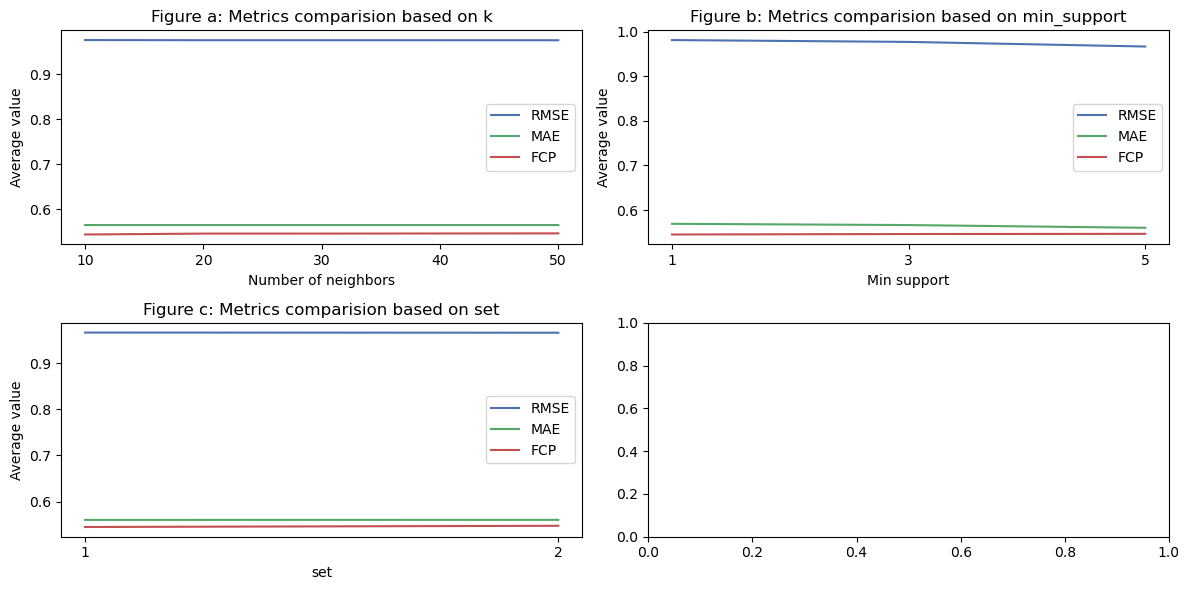

In [30]:
# KNN Basic

plt.style.use("seaborn-v0_8-deep")
# Create structure for the big plot
fig, ax = plt.subplots(2,2, figsize=(12, 6))

## Subplot 1
subplot_func(grouped_results_basic1, 'k', 0,0, 
             'a', 'Number of neighbors', 'Average value')
## Subplot 2
subplot_func(grouped_results_basic2, 'min_support', 0,1, 
             'b', 'Min support', 'Average value')
## Subplot 3
subplot_func(best_params_df_basic_long, 'set', 1,0, 
             'c', 'set', 'Average value')


plt.tight_layout()  # Adjust the layout to prevent overlaps
plt.savefig('CF_model_KNNBasic.png', dpi=1200)
plt.show()

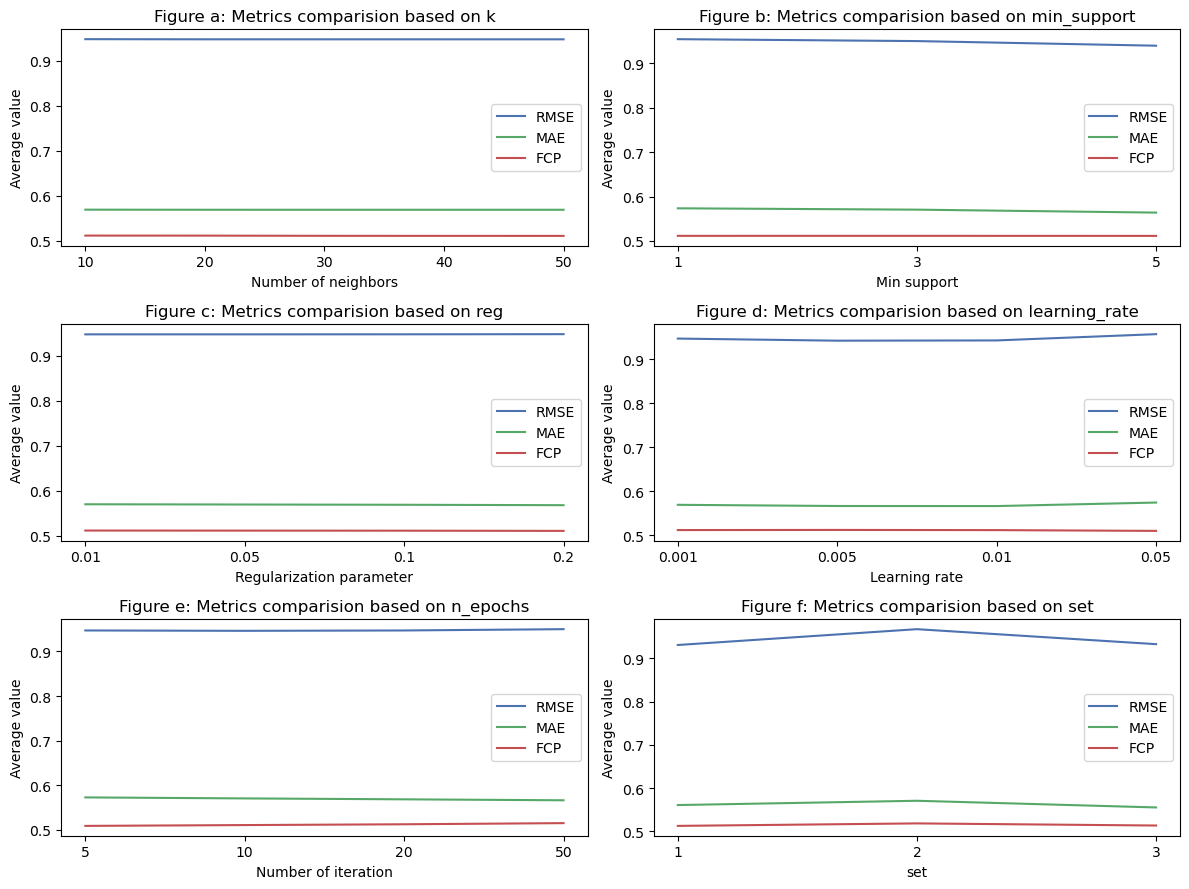

In [31]:
# KNN Baseline

plt.style.use("seaborn-v0_8-deep")
# Create structure for the big plot
fig, ax = plt.subplots(3,2, figsize=(12, 9))

## Subplot 1
subplot_func(grouped_results_baseline1, 'k', 0,0, 
             'a', 'Number of neighbors', 'Average value')
## Subplot 2
subplot_func(grouped_results_baseline2, 'min_support', 0,1, 
             'b', 'Min support', 'Average value')
## Subplot 3
subplot_func(grouped_results_baseline3, 'reg', 1,0, 
             'c', 'Regularization parameter', 'Average value')
## Subplot 4
subplot_func(grouped_results_baseline4, 'learning_rate', 1,1, 
             'd', 'Learning rate', 'Average value')
## Subplot 5
subplot_func(grouped_results_baseline5, 'n_epochs', 2,0, 
             'e', 'Number of iteration', 'Average value')

## Subplot 6
subplot_func(best_params_df_baseline_long, 'set', 2,1, 
             'f', 'set', 'Average value')

plt.tight_layout()  # Adjust the layout to prevent overlaps
plt.savefig('CF_model_KNNBaseline.png', dpi=900)
plt.show()

# Predict missing ratings

In [32]:
# load data
full_df = pd.read_csv('data/full_data_cleaned.csv')
full_df.head(2)

,author_id,rating_x,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,price_usd_x,brand_id,ingredients,limited_edition,out_of_stock,sephora_exclusive,highlights,primary_category,num_rating,niche_product
0,1238130325,4,1.0,NaN,0,0,0,3/12/23,I love this lippy…it makes my lips soft and al...,Yumm,...,24.0,6125,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,1227,0
1,27991208736,3,1.0,0.0,1,1,0,3/9/23,ive tried my friend’s a few times and it does ...,overrated/overpriced,...,24.0,6125,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,1227,0


In [33]:
# select relevant columns
rating_df = full_df[['author_id', 'product_id', 'rating_x', 'submission_time']]

# rename columns
rating_df.columns = ['userID', 'itemID', 'rating', 'timeStamp']

# convert "character" to "dateTime"
rating_df.loc[:,'timeStamp'] = pd.to_datetime(rating_df['timeStamp'], format='mixed')
rating_df.head()

,userID,itemID,rating,timeStamp
0,1238130325,P420652,4,2023-03-12 00:00:00
1,27991208736,P420652,3,2023-03-09 00:00:00
2,9467587295,P420652,5,2023-03-07 00:00:00
3,12367701277,P420652,5,2023-03-05 00:00:00
4,33161024868,P420652,3,2023-03-04 00:00:00


In [34]:
# set up data
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating_df.iloc[:, 0:3], reader)

In [35]:
# train set and anti set
trainset = data.build_full_trainset()
anti_set = data.build_full_trainset().build_anti_testset()
anti_set

[('1238130325', 'P7880', 4.375402357354598),
 ('1238130325', 'P218700', 4.375402357354598),
 ('1238130325', 'P248407', 4.375402357354598),
 ('1238130325', 'P269122', 4.375402357354598),
 ('1238130325', 'P417238', 4.375402357354598),
 ('1238130325', 'P450271', 4.375402357354598),
 ('1238130325', 'P427421', 4.375402357354598),
 ('1238130325', 'P411387', 4.375402357354598),
 ('1238130325', 'P441644', 4.375402357354598),
 ('1238130325', 'P427417', 4.375402357354598),
 ('1238130325', 'P309308', 4.375402357354598),
 ('1238130325', 'P411540', 4.375402357354598),
 ('1238130325', 'P471546', 4.375402357354598),
 ('1238130325', 'P248404', 4.375402357354598),
 ('1238130325', 'P443352', 4.375402357354598),
 ('1238130325', 'P423688', 4.375402357354598),
 ('1238130325', 'P421275', 4.375402357354598),
 ('1238130325', 'P297524', 4.375402357354598),
 ('1238130325', 'P429952', 4.375402357354598),
 ('1238130325', 'P480630', 4.375402357354598),
 ('1238130325', 'P126301', 4.375402357354598),
 ('1238130325',

In [37]:
# Define algorithm with best k
KNNBasicrecommender = KNNBasic(k=50, 
                               sim_options={'name': 'pearson', 'min_support': 5, 'user_based': False})

#Train the model
KNNBasicrecommender.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [40]:
def get_top_n_recommendations(model, user_id, n=10):

    # Filter based on the first value of each item
    filtered_list = [item for item in anti_set if item[0] == user_id]
    predictions = model.test(filtered_list)

    # Convert to df
    predictions_df = pd.DataFrame(predictions)

    # Product info data
    product_info = full_df[['product_id', 'product_name_x', 'brand_name_x', 'price_usd_x',
                            'limited_edition','niche_product', 'out_of_stock']].drop_duplicates()
    
    # Merge data with product info
    predictions_df = predictions_df.merge(product_info, left_on = ['iid'], right_on = ['product_id'])
    
    # Filter out of stock products
    final_df = predictions_df[predictions_df['out_of_stock'] == 0].copy().sort_values(by='est', ascending=False)

    if len(final_df) > n:
        final_df_subset = final_df.head(n)  # Select the top n rows if the dataset has more than n rows
    else:
        final_df_subset = final_df  # Choose the whole dataset if it has n or fewer rows
    
    # Create a dataframe of top n recommendations with product information
    recommendations = []
    for product_id in final_df_subset['product_id']:
        product_info = full_df[full_df['product_id'] == product_id]
        recommendations.append({
            'product_name': product_info.iloc[0].product_name_x,
            'product_id': product_info.iloc[0].product_id,
            'brand': product_info.iloc[0].brand_name_x,
            'limited_edition': product_info.iloc[0].limited_edition,
            'price': product_info.iloc[0].price_usd_x,
            'rating': product_info.rating_x.mean(),
            'niche': product_info.iloc[0].niche_product
        })
    
    return pd.DataFrame(recommendations)

In [41]:
# Example usage
get_top_n_recommendations(KNNBasicrecommender, '1238130325', 5)

,product_name,product_id,brand,limited_edition,price,rating,niche
0,Dreamskin Skin Perfector,P415619,Dior,0,130.0,4.324653,0
1,Vitamin C Lactic 15% Firm & Bright Serum,P501169,Dr. Dennis Gross Skincare,0,85.0,4.723077,1
2,Skin Smoothing Cream Moisturizer,P443359,Dermalogica,0,74.0,4.718631,0
3,Pimple Paste Overnight Blemish Drying Paste,P471039,iNNBEAUTY PROJECT,0,17.0,4.396947,1
4,Set The Stage Hydrating Primer Serum,P458546,LAWLESS,0,32.0,4.680000,1
